# Film Data Analysis

## Initial Setup

In [92]:
import pandas as pd
import sqlite3 as sql
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.stats.multicomp import MultiComparison
import pandas as pd


In [93]:
# will be looking at a lot of tables, so make a report
def df_report(df):
    print(df.info())
    print('===========================================================\n')
    print(df.describe())
    print('===========================================================\n')
    print(df.head())

In [94]:
films = pd.read_csv('Data\\Reduced_Data\\films_2010.csv')

In [95]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         63849 non-null  int64  
 1   primary_title      63849 non-null  object 
 2   year               63849 non-null  float64
 3   runtime_minutes    62741 non-null  float64
 4   genres             62322 non-null  object 
 5   movie_id           62741 non-null  object 
 6   writer             54128 non-null  object 
 7   director           62264 non-null  object 
 8   production_budget  2440 non-null   float64
 9   domestic_gross     4564 non-null   float64
 10  worldwide_gross    3372 non-null   float64
 11  studio             3381 non-null   object 
 12  foreign_gross      3398 non-null   float64
 13  averagerating      62783 non-null  float64
 14  numvotes           62779 non-null  float64
 15  log_numvotes       62115 non-null  float64
 16  actors             627

#### Get rid of what we don't need for the following analyses

In [96]:
drop_columns= ['Unnamed: 0', 'domestic_gross', 'worldwide_gross', 'foreign_gross', 'log_numvotes', 
              'ww_netprofit', 'ww_ppratio', 'f_netprofit', 'f_ppratio']
films = films.drop(drop_columns, axis=1)

In [97]:
films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63849 entries, 0 to 63848
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      63849 non-null  object 
 1   year               63849 non-null  float64
 2   runtime_minutes    62741 non-null  float64
 3   genres             62322 non-null  object 
 4   movie_id           62741 non-null  object 
 5   writer             54128 non-null  object 
 6   director           62264 non-null  object 
 7   production_budget  2440 non-null   float64
 8   studio             3381 non-null   object 
 9   averagerating      62783 non-null  float64
 10  numvotes           62779 non-null  float64
 11  actors             62741 non-null  object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 6.8+ MB


#### Get rid of the null data in the financial columns

In [98]:
films = films[films.d_netprofit.notna()]

In [99]:
films.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB


In [100]:
df_report(films)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2440 entries, 14 to 63144
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   primary_title      2440 non-null   object 
 1   year               2440 non-null   float64
 2   runtime_minutes    2036 non-null   float64
 3   genres             2035 non-null   object 
 4   movie_id           2036 non-null   object 
 5   writer             1947 non-null   object 
 6   director           2030 non-null   object 
 7   production_budget  2440 non-null   float64
 8   studio             1235 non-null   object 
 9   averagerating      2019 non-null   float64
 10  numvotes           2019 non-null   float64
 11  actors             2036 non-null   object 
 12  d_netprofit        2440 non-null   float64
 13  d_ppratio          2440 non-null   float64
dtypes: float64(7), object(7)
memory usage: 285.9+ KB
None

              year  runtime_minutes  production_budget  average

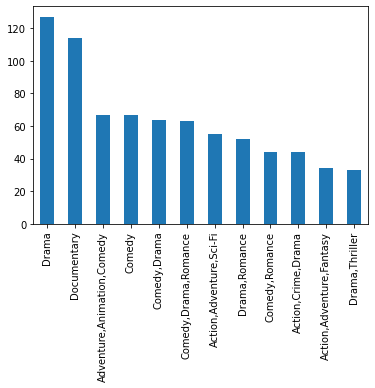

In [101]:
# THIS CODE WILL LEAVE THE GENRES COLUMN IN ITS ORIGINAL FORM FOR GROUPING PURPOSES
top_ten_genres = films.genres.value_counts().head(12)
top_ten_genres.plot(kind='bar');
top_ten_list = list(top_ten_genres.index)
films_top10 = films[films['genres'].isin(top_ten_list)]

---

---

## Analyzing d_pp_ratio by genres

In [102]:
films_dpp = films_top10

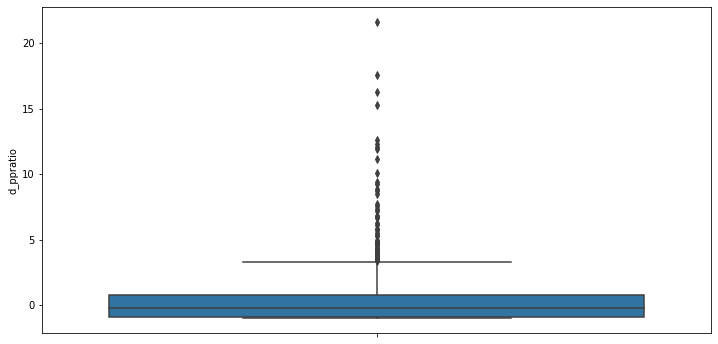

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=films_dpp);

In [104]:
# IQR method for removing outliers
Q1 = films_dpp.d_ppratio.quantile(0.25)
Q3 = films_dpp.d_ppratio.quantile(0.75)
IQR = Q3 - Q1
films_dpp = films_dpp[~((films_dpp.d_ppratio < (Q1 - 1.5 * IQR)) | (films_dpp.d_ppratio > (Q3 + 1.5 * IQR)))]

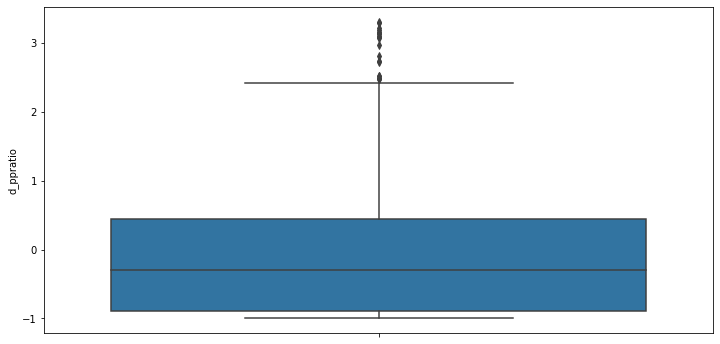

In [105]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_ppratio', data=films_dpp);

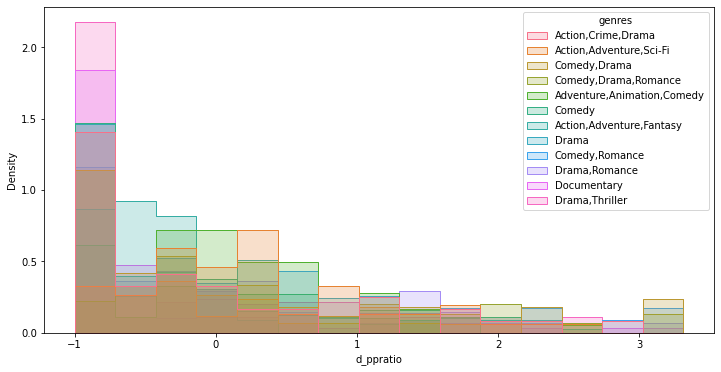

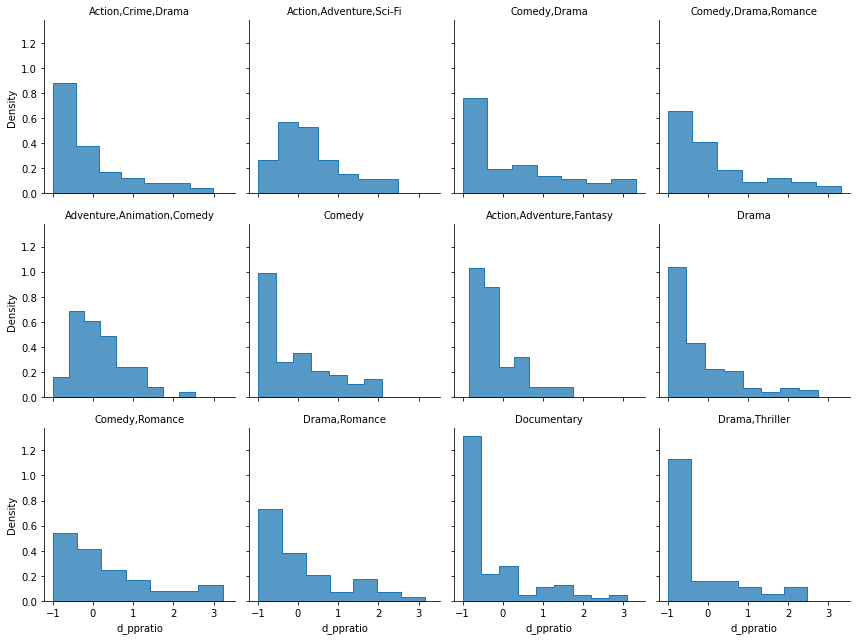

In [106]:
plt.figure(figsize=(12, 6))
sns.histplot(data=films_dpp, x='d_ppratio', hue='genres', element='step', stat='density', common_norm=False)

g = sns.FacetGrid(films_dpp, col='genres', col_wrap=4, sharex=True, sharey=True)
g.map(sns.histplot, 'd_ppratio', element='step', stat='density', common_norm=False)

# Optional: Set the titles and adjust the axis labels
g.set_titles('{col_name}')
g.set_axis_labels('d_ppratio', 'Density')

# Show the plot
plt.show()


In [107]:
films_dpp.groupby('genres').d_ppratio.std()

genres
Action,Adventure,Fantasy      0.589722
Action,Adventure,Sci-Fi       0.849971
Action,Crime,Drama            1.057237
Adventure,Animation,Comedy    0.673141
Comedy                        0.924243
Comedy,Drama                  1.273844
Comedy,Drama,Romance          1.173144
Comedy,Romance                1.229493
Documentary                   0.973935
Drama                         0.919143
Drama,Romance                 1.083097
Drama,Thriller                0.958909
Name: d_ppratio, dtype: float64

In [108]:
films_dpp.groupby('genres').d_ppratio.count()

genres
Action,Adventure,Fantasy       34
Action,Adventure,Sci-Fi        53
Action,Crime,Drama             42
Adventure,Animation,Comedy     63
Comedy                         64
Comedy,Drama                   58
Comedy,Drama,Romance           52
Comedy,Romance                 40
Documentary                   102
Drama                         114
Drama,Romance                  48
Drama,Thriller                 32
Name: d_ppratio, dtype: int64

In [109]:
# Assuming 'data' is a pandas DataFrame with your categories as 'category'
# and the dependent variable as 'y'
H, p_value = stats.kruskal(*[group['d_ppratio'].values for name, group in films_dpp.groupby('genres')])

print('H-statistic:', H)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

H-statistic: 50.15063867572903
P-value: 5.880897364855988e-07
There is a significant difference between the categories.


In [110]:
# Assuming 'data' is your DataFrame with 'category' and 'y' columns
mc = MultiComparison(films_dpp['d_ppratio'], films_dpp['genres'])
result = mc.tukeyhsd()
result.summary()
tukey_summary_df = pd.DataFrame(data=result._results_table.data[1:], columns=result._results_table.data[0])

# Filter the DataFrame to only show rows where 'reject' is True
significant_results = tukey_summary_df[tukey_summary_df['reject'] == True]

print(significant_results)

                     group1       group2  meandiff   p-adj   lower   upper  \
17  Action,Adventure,Sci-Fi  Documentary   -0.5807  0.0272 -1.1292 -0.0321   

    reject  
17    True  


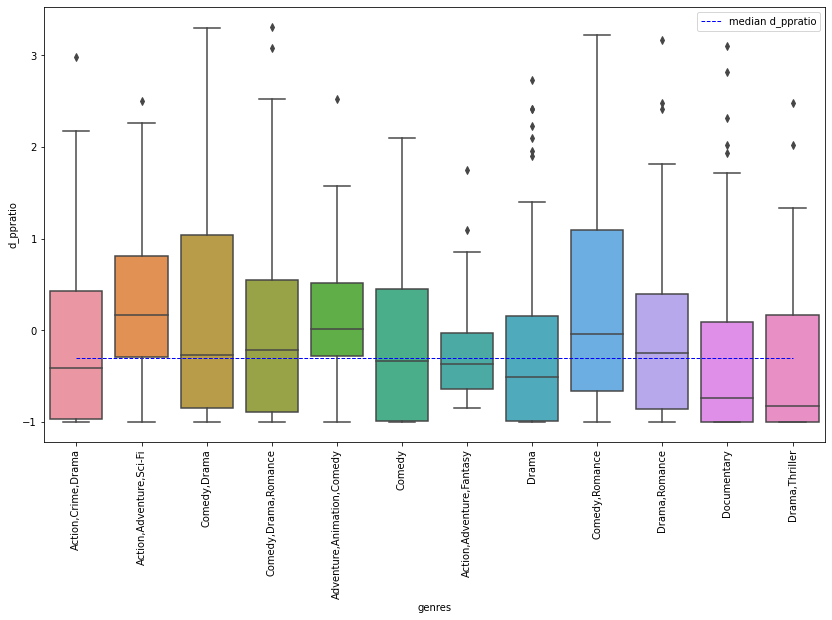

In [111]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='d_ppratio', data=films_dpp)
plt.hlines(y=films_dpp.d_ppratio.median(), xmin=0, xmax=11, 
           colors='blue', linestyles='dashed', lw=1, label='median d_ppratio')
plt.legend()
plt.xticks(rotation=90)
plt.show()

## Main take-aways from this section:

## With outliers removed, we see a statistically significant difference in domestic ppratio between the genres: 
##  -- 'Action,Adventure,Sci-Fi' versus 'Documentary' -AND- 'Drama'


## We also observe the median of 'Action,Adventure,Sci-Fi' and 'Adventure,Animation,Comedy' well above the population mean, with 'Comedy,Romance' also a consideration

## Therefore we should favor producing movies of the genres 'Action,Adventure,Sci-Fi', 'Adventure,Animation,Comedy' and possibly 'Comedy,Romance' while steering clear of genre 'Documentary' and potentially 'Drama'

---

---

## Analyzing d_netprofit by genres

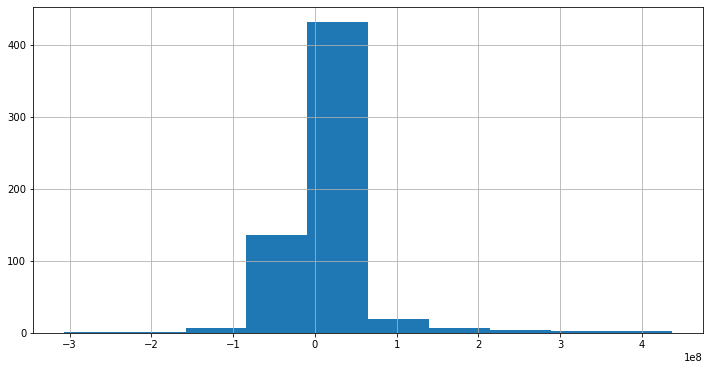

In [21]:
plt.figure(figsize=(12, 6))
films_top10.d_netprofit.hist();

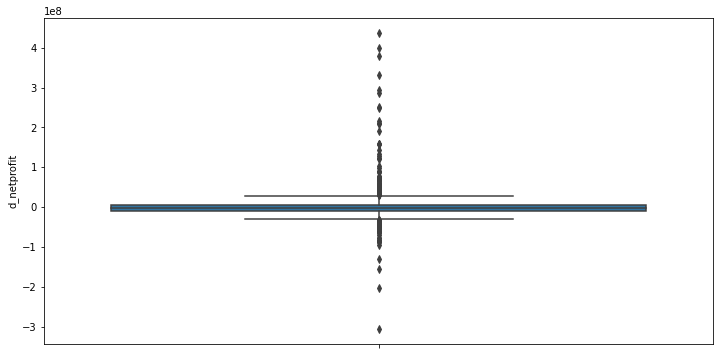

In [22]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='d_netprofit', data=films_top10);

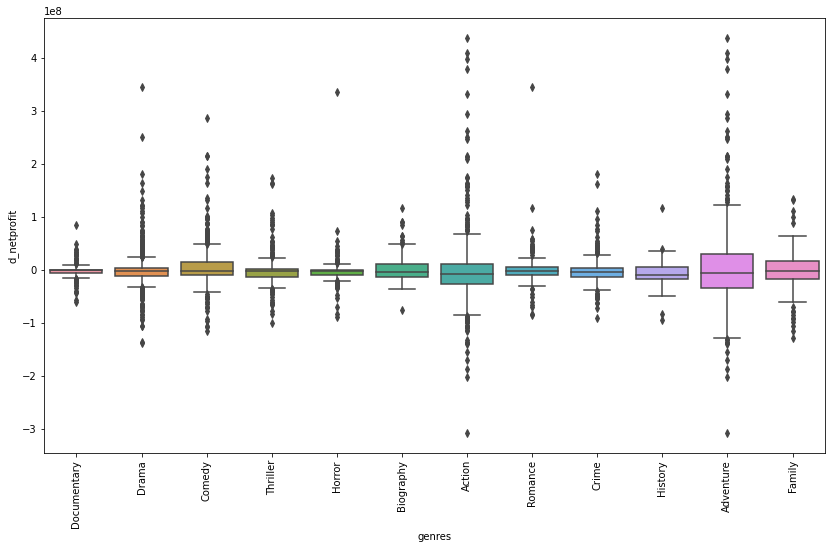

In [39]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='genres', y='d_netprofit', data=films_top10)
plt.xticks(rotation=90)
plt.show()

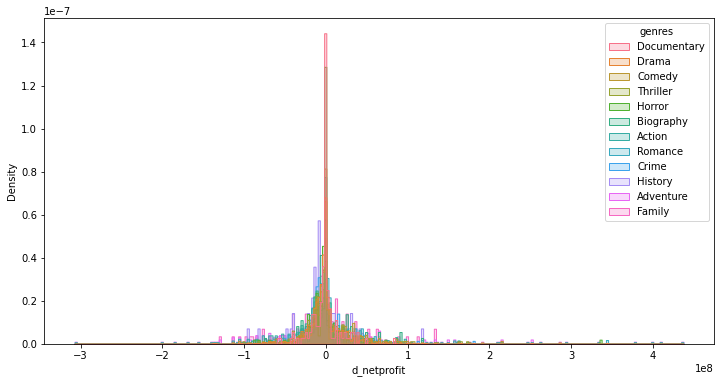

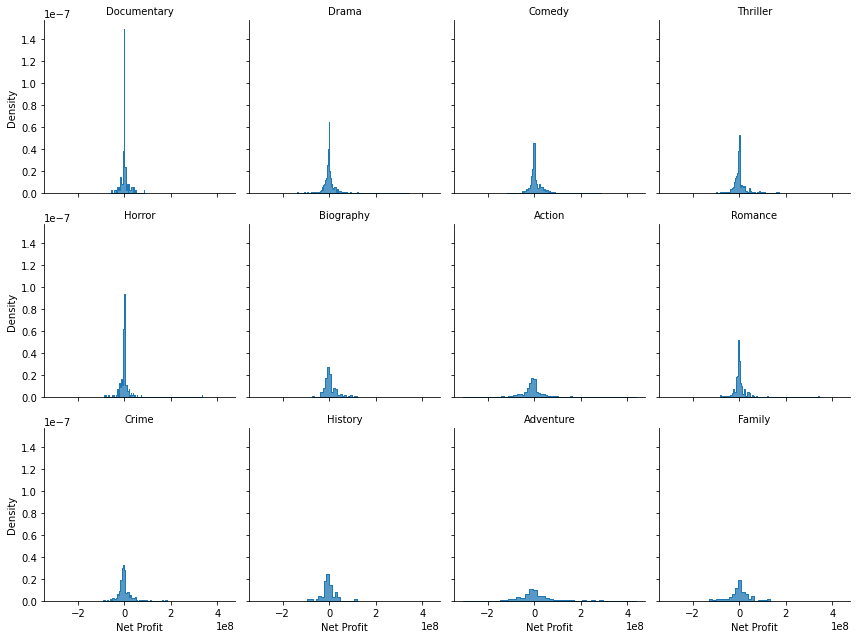

In [40]:
plt.figure(figsize=(12, 6))
sns.histplot(data=films_top10, x='d_netprofit', hue='genres', element='step', stat='density', common_norm=False)

g = sns.FacetGrid(films_top10, col='genres', col_wrap=4, sharex=True, sharey=True)
g.map(sns.histplot, 'd_netprofit', element='step', stat='density', common_norm=False)

# Optional: Set the titles and adjust the axis labels
g.set_titles('{col_name}')
g.set_axis_labels('Net Profit', 'Density')

# Show the plot
plt.show()


In [194]:
# Assuming 'data' is a pandas DataFrame with your categories as 'category'
# and the dependent variable as 'y'
H, p_value = stats.kruskal(*[group['d_netprofit'].values for name, group in films_top10.groupby('genres')])

print('H-statistic:', H)
print('P-value:', p_value)

if p_value < 0.05:
    print("There is a significant difference between the categories.")
else:
    print("There is no significant difference between the categories.")

H-statistic: 9.325769819875493
P-value: 0.40776237355705786
There is no significant difference between the categories.


## Main take-aways from this section:

## No significant difference seen in domestic net profit by genre, we should not focus on this variable as a KPI

---

---